# earthaccess a NASA Earthdata API Client 🌍 in Python

## Overview

**TL;DR**:  *earthaccess* is uses NASA APIs to search, preview and access NASA datasets on-prem and in the cloud with 4 lines of Python.

There are many ways to access NASA datasets, we can use the NASA's Earthdata search portal. We can use DAAC specific websites or tools.
We could even use data.gov! These web portals are great but... they are not designed for programmatic access and reproducible workflows. 
This is extremely important in the age of the cloud and reproducible open science. In this context, **earthaccess** aims to be a simple 
library that can deal with the important parts of the metadata so we can access or download data without having to worry if a given dataset is on-prem or in the cloud.

The core function of auth is to deal with cloud credentials and remote file sessions (fsspec or requests).
essentially, anything that requires you to log in to Earthdata. Most of this will happen behind-the-scenes for you once you have been authenticated.

### NASA EDL and the Auth class

* **Step 1**. We need to open an account with [NASA Eardtada](https://urs.earthdata.nasa.gov/), this credentials will allow us to access NASA datasets.

Once we have our account we can use it with *earthaccess* 

In [57]:
import earthaccess
import shapely
import ipyleaflet

auth = earthaccess.login()

## Searching for data using a region of interest

In [48]:
with open("bosque_primavera.json") as f:
    geojson = json.load(f)

geojosn_geom = geojson['features'][0]['geometry']

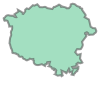

In [49]:
# polygon = shapely.geometry.box(*bbox, ccw=True)
polygon = shapely.geometry.shape(geojosn_geom)
polygon

In [50]:
len(polygon.boundary.coords)

1527

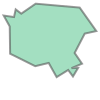

In [51]:
p = polygon.simplify(0.01)
p

In [52]:
len(p.boundary.coords)

20

In [53]:
polygon_coords = [(coord[0], coord[1]) for coord in p.boundary.coords]

## Search and Access with earthaccess

earthaccess uses NASA's [search API](https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html) to search for data from the different Distributed Archive Centers, the data can be hosted by the DAACs or in AWS, with earthaccess we don't need to think about this because it will handle the authentication for us. For reproducible workflows we just need to use the dataset (or collection as NASA calls them) `concept_id`. 

The `concept_id` of a collection can be found with *earthaccess* or using NASA Earthdata [search portal](https://search.earthdata.nasa.gov/search).


In [60]:
if len(sw.roi) > 0:
    polygon_coords = sw.roi

results = earthaccess.search_data(
    concept_id = ["C2613553260-NSIDC_CPRD", "C2237824918-ORNL_CLOUD"],
    temporal= ("2021-01", "2023-09"),
    polygon=polygon_coords
)

Granules found: 49


In [62]:
sw = earthaccess.search_widget()
sw.m.add(ipyleaflet.GeoJSON(name="ROI",
        data=geojosn_geom,
        style={
          "color": "red",
          "opacity": 0.9,
          "fillOpacity": 0.1
          }
        ))
sw.explore(results)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [54]:
gdf.head(ipyleaflet.Geo)
gdf = sw.to_geopandas(results)

,size,dataset-id,native-id,provider-id,_related_urls,_beginning_date_time,_ending_date_time,geometry
0,55.712407,ATLAS/ICESat-2 L3A Land and Vegetation Height ...,ATL08_20210103194147_01651007_006_01.h5,NSIDC_CPRD,[{'URL': 'https://data.nsidc.earthdatacloud.na...,2021-01-03T19:41:47.222Z,2021-01-03T19:44:08.049Z,"POLYGON ((-102.74055 27.04262, -102.86583 27.0..."
1,51.302756,ATLAS/ICESat-2 L3A Land and Vegetation Height ...,ATL08_20210129062030_05541001_006_01.h5,NSIDC_CPRD,[{'URL': 'https://data.nsidc.earthdatacloud.na...,2021-01-29T06:25:09.419Z,2021-01-29T06:27:32.313Z,"POLYGON ((-103.37694 17.82757, -103.25939 17.8..."
2,21.235174,ATLAS/ICESat-2 L3A Land and Vegetation Height ...,ATL08_20210227045631_09961001_006_01.h5,NSIDC_CPRD,[{'URL': 'https://data.nsidc.earthdatacloud.na...,2021-02-27T05:01:09.321Z,2021-02-27T05:03:33.211Z,"POLYGON ((-103.20873 17.77707, -103.09164 17.7..."
3,59.943995,ATLAS/ICESat-2 L3A Land and Vegetation Height ...,ATL08_20210430020019_05541101_006_02.h5,NSIDC_CPRD,[{'URL': 'https://data.nsidc.earthdatacloud.na...,2021-04-30T02:04:59.091Z,2021-04-30T02:07:21.085Z,"POLYGON ((-103.47879 17.87801, -103.36156 17.8..."
4,54.423923,ATLAS/ICESat-2 L3A Land and Vegetation Height ...,ATL08_20210529003623_09961101_006_01.h5,NSIDC_CPRD,[{'URL': 'https://data.nsidc.earthdatacloud.na...,2021-05-29T00:41:01.353Z,2021-05-29T00:43:25.227Z,"POLYGON ((-103.20843 17.77693, -103.09139 17.7..."


## On-prem access  📡

DAAC hosted data

In [ ]:
%%time
# accessing the data on prem means downloading it if we are in a local environment or "uploading them" if we are in the cloud.
files = earthaccess.download(results[0:2], "./data")
files

## Cloud access ☁️

Same API, just a different origin

In [ ]:
%%time

files = earthaccess.download(results[0:2], "./data")
files

### Related links

**CMR** API documentation: https://cmr.earthaccess.nasa.gov/search/site/docs/search/api.html

**EDL** API documentation: https://urs.earthaccess.nasa.gov/

NASA OpenScapes: https://nasa-openscapes.github.io/earthaccess-cloud-cookbook/

NSIDC: https://nsidc.org

## Subsetting and Reading Icesat-2 Data